In [31]:

using Jacobi
using PyPlot
using DataFrames
using Interact
include("../../HPFEM.jl/src/HPFEM.jl")
include("../src/HPFEM_mod.jl")


lagrange_oed_spec (generic function with 5 methods)

# Edo
   $$ y'' + y = (1 + 4 (k \pi)^2)sin(2 k \pi x) \\
y(-1) = y(1) = 0$$

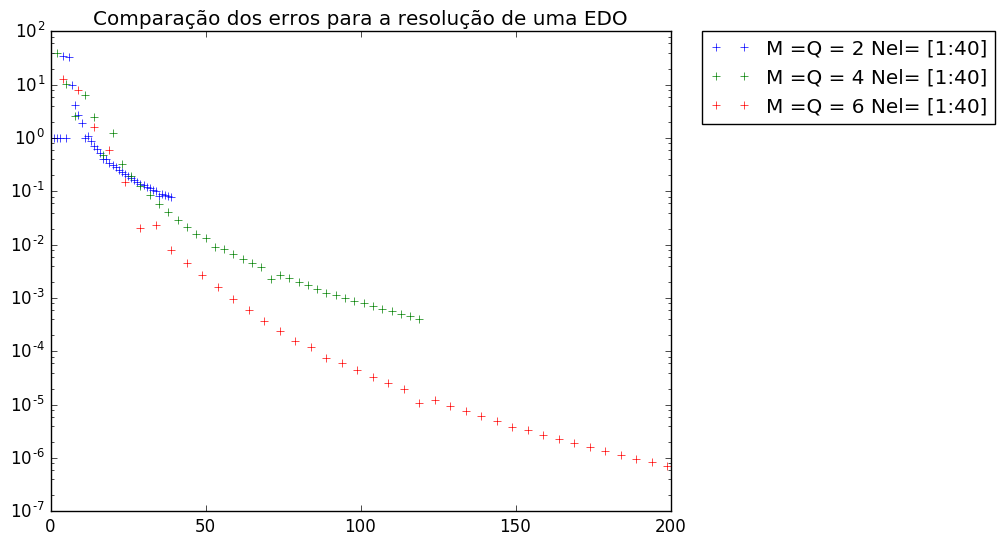

PyObject <matplotlib.legend.Legend object at 0x7f018a651d50>

In [32]:
k = 3
Q_max = M_max = 50
nel_max = 40


fun(x) = (1 + 4*(k*pi)^2)*sin(2*k*pi*x)
resp(x) = sin(2*k*pi*x)

EMM =DataFrame(erro = Float64[], dof =  Float64[])
EM2 =DataFrame(erro = Float64[], dof =  Float64[])
for M = 3:M_max
    temp = lagrange_oed_spec(M,M,1,fun,resp)
    push!(EMM,temp)

    temp = lagrange_oed_spec(M,M,5,fun,resp)
    push!(EM2,temp)
end
EMe2 =DataFrame(erro = Float64[], dof =  Float64[])
EMe3 =DataFrame(erro = Float64[], dof =  Float64[])
EMe = DataFrame(erro = Float64[], dof =  Float64[])
for nel = 1:nel_max
    temp = lagrange_oed_spec(4,4,nel,fun,resp)
    push!(EMe,temp)

    temp = lagrange_oed_spec(2,2,nel,fun,resp)
    push!(EMe2,temp)

    temp = lagrange_oed_spec(6,6,nel,fun,resp)
    push!(EMe3,temp)
end    
semilogy(EMe2[:dof],EMe2[:erro],"+",label = "M =Q = 2 Nel= [1:$nel_max]")
semilogy(EMe[:dof],EMe[:erro],"+",label = "M =Q = 4 Nel= [1:$nel_max]")
semilogy(EMe3[:dof],EMe3[:erro],"+",label = "M =Q = 6 Nel= [1:$nel_max]")
#semilogy(EMM[:dof],EMM[:erro],"+",label = "Q = [1:$M_max] Nel= 1")
#semilogy(EM2[:dof],EM2[:erro],"+",label = "Q = M  Nel = 5")
#title("K = $k")
title("Comparação dos erros para a resolução de uma EDO")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [190]:
EMM

,erro,dof
1,0.998026728428272,1.0
2,38.82229692956205,2.0
3,7.5024778599000665,3.0
4,12.939320640975758,4.0
5,16.880465386493647,5.0
6,36.81261413853323,6.0
7,11.91477499693923,7.0
8,18.53242376518467,8.0
9,23.29862544918541,9.0
10,16.11035085477368,10.0


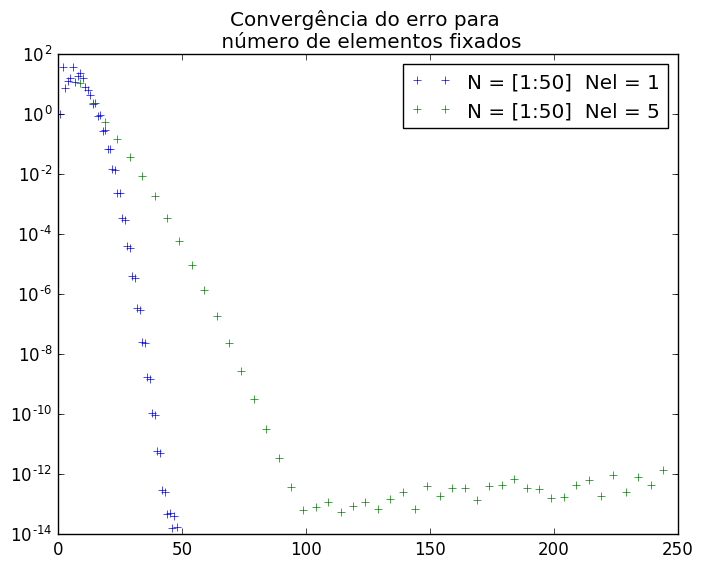

PyObject <matplotlib.legend.Legend object at 0x7f018a6956d0>

In [33]:
title("Convergência do erro para \n número de elementos fixados")
semilogy(EMM[:dof],EMM[:erro],"+",label = "N = [1:$M_max]  Nel = 1")
semilogy(EM2[:dof],EM2[:erro],"+",label = "N = [1:$M_max]  Nel = 5")
legend()

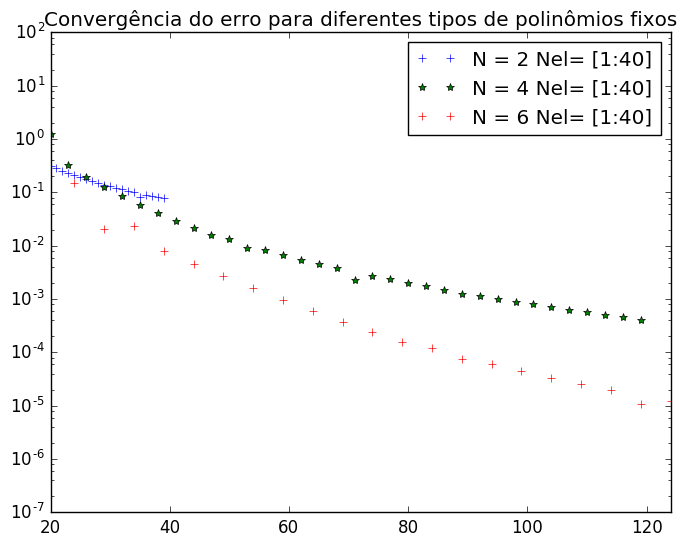

PyObject <matplotlib.text.Text object at 0x7f01890f2b50>

In [34]:
semilogy(EMe2[:dof],EMe2[:erro],"+",label = "N = 2 Nel= [1:$nel_max]")
semilogy(EMe[:dof],EMe[:erro],"*",label = "N = 4 Nel= [1:$nel_max]")
semilogy(EMe3[:dof],EMe3[:erro],"+",label = "N = 6 Nel= [1:$nel_max]")
xlim([20,124])
legend()
title("Convergência do erro para diferentes tipos de polinômios fixos")

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"Q",50,1:1:100,true)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"M",50,1:1:100,true)

Interact.Slider{Int64}(Signal{Int64}(25, nactions=0),"nel",25,1:1:50,true)

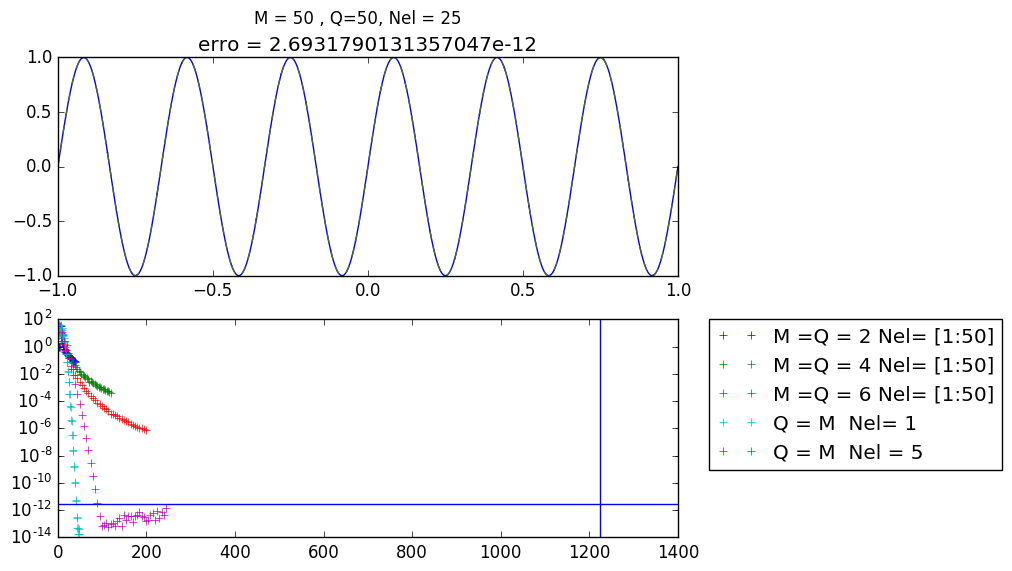

In [35]:
l = figure(2)
Q_max = M_max = 100
nel_max = 50
@manipulate for Q= 1:1:Q_max,M=1:1:M_max, nel=1:1:nel_max; withfig(l) do
        fun(x) = (1 + 4*(k*pi)^2)*sin(2*k*pi*x)
        resp(x) = sin(2*k*pi*x)
        if Q < M
            Q=M
        end
        subplot(211)
        erro = lagrange_oed_plot(M,Q,nel,fun,resp)
        dof = lagrange_oed_spec(M,Q,nel,fun,resp)
        

        subplot(212)
        
        semilogy(EMe2[:dof],EMe2[:erro],"+",label = "M =Q = 2 Nel= [1:$nel_max]")
        semilogy(EMe[:dof],EMe[:erro],"+",label = "M =Q = 4 Nel= [1:$nel_max]")
        semilogy(EMe3[:dof],EMe3[:erro],"+",label = "M =Q = 6 Nel= [1:$nel_max]")
        semilogy(EMM[:dof],EMM[:erro],"+",label = "Q = M  Nel= 1")
        semilogy(EM2[:dof],EM2[:erro],"+",label = "Q = M  Nel = 5")
        
        PyPlot.axhline(dof[1])
        PyPlot.axvline(dof[2])
        legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    end
end

In [81]:
nel = 10
M = 10
Q = M
tempo = 0.0
for M in 1:M_max
    tic()
    erro = lagrange_oed_spec(M,Q,nel,fun,resp)[1]
    t = toc()
    tempo = [tempo, t]
end
t


LoadError: LoadError: invalid Array dimensions
while loading In[81], in expression starting on line 5

In [189]:
nel = 10
M = 10
Q = M
tempo1 = UInt64[0]
nel = 10
for M in 3:100
    Q = M 
    tic()
    lagrange_oed_spec(M,Q,nel,fun,resp)
    t = toc()
    tempo1 = [tempo1 t]
end
plot(3:10,tempo[2:end])

elapsed time: 0.001671232 seconds
elapsed time: 0.000338332 seconds
elapsed time: 0.000336985 seconds
elapsed time: 0.000355656 seconds
elapsed time: 0.000367526 seconds
elapsed time: 0.000443184 seconds
elapsed time: 0.000475094 seconds
elapsed time: 0.000513526 seconds
elapsed time: 0.000586368 seconds
elapsed time: 0.023905073 seconds
elapsed time: 0.00371074 seconds
elapsed time: 0.001897609 seconds
elapsed time: 0.000963529 seconds
elapsed time: 0.001071239 seconds
elapsed time: 0.001229861 seconds
elapsed time: 0.001341422 seconds
elapsed time: 0.001481558 seconds
elapsed time: 0.002429069 seconds
elapsed time: 0.001790968 seconds
elapsed time: 0.001955164 seconds
elapsed time: 0.002561736 seconds
elapsed time: 0.002333557 seconds
elapsed time: 0.009232074 seconds
elapsed time: 0.003289713 seconds
elapsed time: 0.003102536 seconds
elapsed time: 0.003299958 seconds
elapsed time: 0.003591449 seconds
elapsed time: 0.007059937 seconds
elapsed time: 0.00405288 seconds
elapsed time: 0.

LoadError: LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError(u'x and y must have same first dimension',)
  File "/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3154, in plot
    ret = ax.plot(*args, **kwargs)
  File "/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/__init__.py", line 1812, in inner
    return func(ax, *args, **kwargs)
  File "/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 1424, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 386, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 364, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 223, in _xy_from_xy
    raise ValueError("x and y must have same first dimension")

while loading In[189], in expression starting on line 13

elapsed time: 0.006674729 seconds
elapsed time: 0.001026637 seconds
elapsed time: 0.000703612 seconds
elapsed time: 0.000641249 seconds
elapsed time: 0.000642202 seconds
elapsed time: 0.000658082 seconds
elapsed time: 0.000683214 seconds
elapsed time: 0.000713612 seconds
elapsed time: 0.00074705 seconds
elapsed time: 0.000651688 seconds
elapsed time: 0.000629463 seconds
elapsed time: 0.000630841 seconds
elapsed time: 0.000623838 seconds
elapsed time: 0.001125569 seconds
elapsed time: 0.000715407 seconds
elapsed time: 0.000971027 seconds
elapsed time: 0.000786577 seconds
elapsed time: 0.000803489 seconds
elapsed time: 0.000828639 seconds
elapsed time: 0.000844204 seconds
elapsed time: 0.000868513 seconds
elapsed time: 0.000891946 seconds
elapsed time: 0.001163761 seconds
elapsed time: 0.001316161 seconds
elapsed time: 0.000991395 seconds
elapsed time: 0.00096906 seconds
elapsed time: 0.00098644 seconds
elapsed time: 0.001000063 seconds
elapsed time: 0.00099051 seconds
elapsed time: 0.00

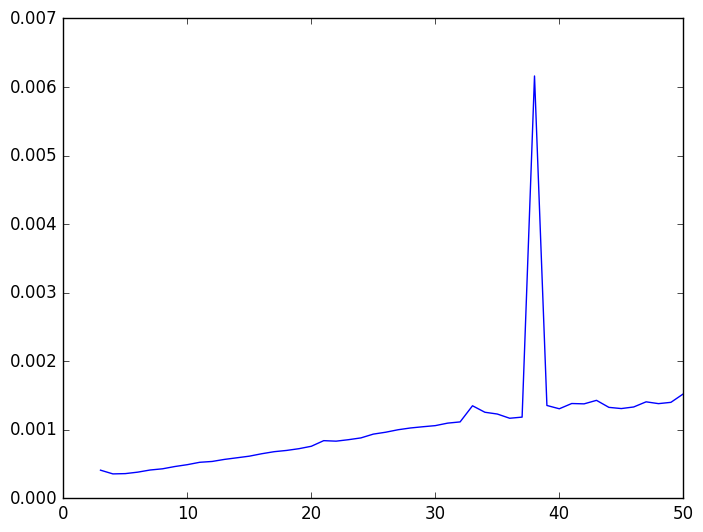

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0184bbe3d0>

In [188]:
nel = 10
M = 10
Q = M
tempo2 = UInt64[0]

for nel in 3:nel_max
    Q = M =10
    tic()
    lagrange_oed_spec(M,Q,nel,fun,resp)
    t = toc()
    tempo2 = [tempo2 t]
end
plot(3:nel_max,tempo[2:end])

In [99]:
t = [0 t]

1x10 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0014315